# **Sales Prediction Using Python**

Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product. Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product.

## **Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

## **Loading The Dataset**

In [2]:
# Reading the csv file
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## **Dropping Unwanted Column**

In [3]:
# Dropping Id columns because it's useless
df = df.drop(["Unnamed: 0"],axis=1)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## **Analyzing The Dataset**

In [4]:
# Getting the size of the dataset
df.size

800

In [5]:
# Getting shape of the dataset
df.shape

(200, 4)

In [6]:
# Getting info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
# Checking for null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
# Descriptive statistical analysis of data
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## **Visualization**

<Axes: >

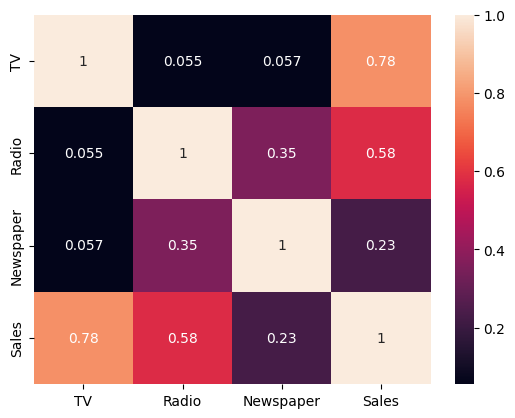

In [9]:
# Heatmap Plot of correlation
sns.heatmap(df.corr(),annot=True)

In [10]:
# Plotting for TV vs Sales
px.scatter(df, x='TV', y='Sales', width=850, height=500, title='TV vs Sales')

In [11]:
# Plotting for Radio vs Sales
px.scatter(df, x='Radio', y='Sales', width=850, height=500, title='Radio vs Sales')

In [12]:
# Plotting for Newspaper vs Sales
px.scatter(df, x='Newspaper', y='Sales', width=850, height=500, title='Newspaper vs Sales')

## **Model Training**

In [13]:
x = df.iloc[:, 0:3]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [14]:
y = df.iloc[:, -1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

## **Splitting The Data Into Test And Train Data**

In [15]:
# Importing train test split library
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

## **Training The Model**

In [16]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

## **Prediction**

In [17]:
y_pred = model.predict(x_test)
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

## **Model Evaluation**

In [18]:
model.intercept_

2.979067338122629

In [19]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [20]:
from sklearn import metrics

# Mean Absolute Error
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_pred, y_test))

Mean Absolute Error:  1.4607567168117603


In [21]:
# Root Mean Squared Error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_pred, y_test)))

Root Mean Squared Error: 1.78159966153345


In [22]:
# R-Squared
print('R-Squared: ', metrics.r2_score(y_pred, y_test))

R-Squared:  0.8791069137120033


## **Actual and Prediction**

In [23]:
act_pred = pd.DataFrame({'Actual':y_test.values.flatten(), 'Predict':y_pred.flatten()})
act_pred

,Actual,Predict
0,16.9,16.408024
1,22.4,20.889882
2,21.4,21.553843
3,7.3,10.608503
4,24.7,22.112373
5,12.6,13.105592
6,22.3,21.057192
7,8.4,7.461010
8,11.5,13.606346
9,14.9,15.155070


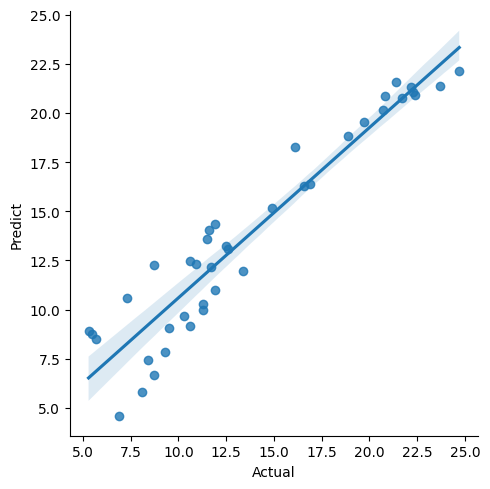

In [24]:
# Actual and Predicted Visualization
sns.lmplot(data = act_pred, x= 'Actual', y = "Predict")

import warnings
warnings.filterwarnings("ignore")

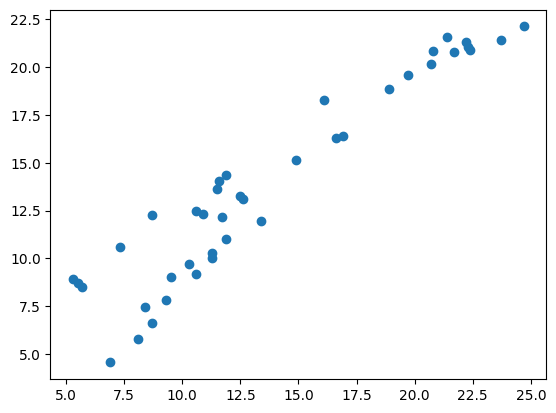

In [25]:
plt.scatter(y_test , y_pred)

## **Conclusion**

In this task, I have used the Advertising Dataset.

Then, I did an analysis and visualization of the dataset.

And then I trained the model using Linear Regression Algorithm and predicted the values.

Made a dataframe of actual and predicted values.

Finally, made a visualization of actual and predicted values.